# Introduccion

Se ha decidido abrir un pequeño café reagentado por robots en Los Angeles, por lo que se decidé hacer un estudio de las condiciones actuales de mercado y así tener un perspectiva más amplia para la toma de decisones

Presentation: <https://github.com/JesusAntonioFelix/ANALISIS-RESTAURANTES-EN-LOS-ANGELES.git>

# Procesamiento de datos

Se importa las librerias y las bases de datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#Importacion base de datos
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
#Obtencion de información de la base de datos

print(rest_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None


In [4]:
#Información de las columnas

display(rest_data)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [5]:
duplicates = rest_data.duplicated()
print(duplicates.sum())

0


# Analisis de datos

object_type
Bakery        0.029323
Bar           0.030256
Cafe          0.045073
Fast Food     0.110455
Pizza         0.033157
Restaurant    0.751736
dtype: float64


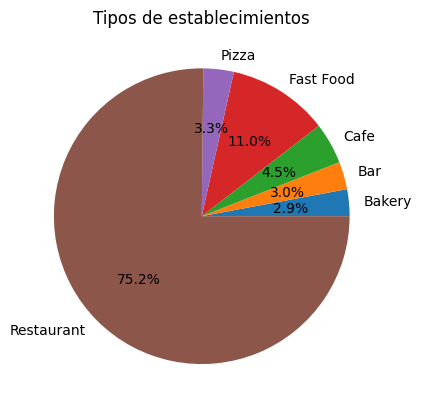

In [6]:
#Proporciones por tipo de establecimiento.
proporciones = rest_data.groupby('object_type').size() / rest_data['object_type'].count()



print(proporciones)

plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%')
plt.title('Tipos de establecimientos')
plt.show()

Se puede ver que la mayoria de establecimientos en la ciudad son de tipo restaurantes, siendo un 75% mientras los siguientes son fast food con 11% y café con 4.5%

chain
No cadena    0.618988
Cadena       0.381012
dtype: float64


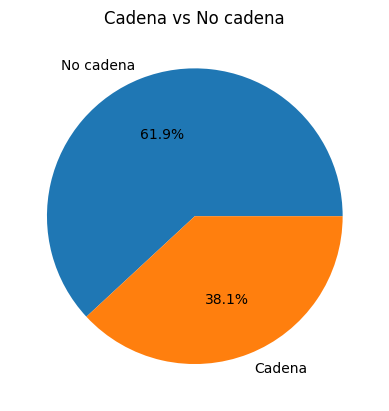

In [7]:
#Proporciones de los establecimientos que pertenecen a una cadena y de los que no. 

proporciones_cadena = rest_data.groupby('chain').size() / rest_data['chain'].count()

proporciones_cadena = proporciones_cadena.rename({False: 'No cadena', True : 'Cadena'})

print(proporciones_cadena)

plt.pie(proporciones_cadena, labels=proporciones_cadena.index, autopct='%1.1f%%')
plt.title('Cadena vs No cadena')
plt.show()

Los datos arrojan que el 61.9% de los establecimientos no son cadena, mientras que el 38.1% si lo son

object_type
Bakery         283
Bar             77
Cafe           266
Fast Food      605
Pizza          153
Restaurant    2292
dtype: int64

object_type
Bar            215
Cafe           169
Fast Food      461
Pizza          166
Restaurant    4961
dtype: int64
object_type
Bakery             NaN
Bar           0.263699
Cafe          0.611494
Fast Food     0.567542
Pizza         0.479624
Restaurant    0.316007
dtype: float64


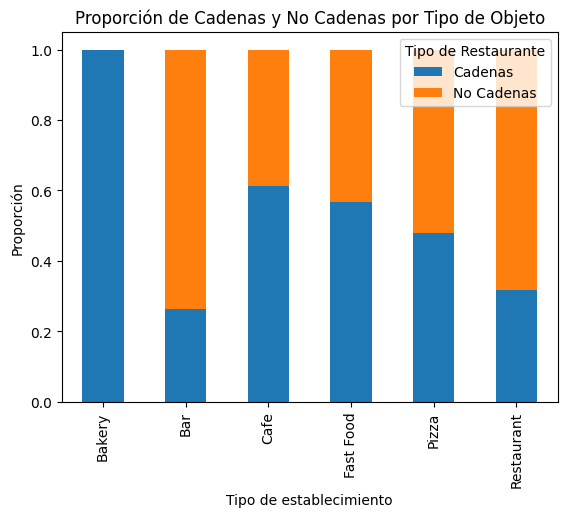

In [8]:
# Tipo de establecimiento en cadenas


# datos en cadenas y no cadenas
cadenas = rest_data[rest_data['chain'] == True]
no_cadenas = rest_data[rest_data['chain'] == False]

cadenas_tipo = cadenas.groupby('object_type').size()
no_cadenas_tipo = no_cadenas.groupby('object_type').size()


print(cadenas_tipo)

print()

print(no_cadenas_tipo)

#Total entre cadenas y no cadenas por tipo de establecimiento
total_tipo = cadenas_tipo + no_cadenas_tipo
#Propocion de cadenas
proporcion_cadenas = cadenas_tipo / total_tipo

print(proporcion_cadenas)

data = pd.DataFrame({'Cadenas': cadenas_tipo, 'No Cadenas': no_cadenas_tipo}).fillna(0)

# Calcula la proporción
proporcion = data.div(data.sum(axis=1), axis=0)

# Gráfico de barras apiladas
proporcion.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])


plt.xlabel('Tipo de establecimiento')
plt.ylabel('Proporción')
plt.title('Proporción de Cadenas y No Cadenas por Tipo de Objeto')
plt.legend(title='Tipo de Restaurante')
plt.show()


Se puede decir que poco mas de la mitd de cafes son cadenas pues estos son un 61% mientras que comida rapida son 56% cadenas,   los demas tipos no superan ni siquiera el 50%, por lo que se puede decir que la mayoria de pizzerias, restaurantes y bares no son cadenas.

              count       mean        std  min   25%   50%    75%    max
object_type                                                             
Bakery        283.0  21.773852  25.691123  1.0   9.0  18.0  24.00  218.0
Bar            77.0  40.259740  45.340351  1.0  12.0  21.0  44.00  194.0
Cafe          266.0  25.917293  20.334391  1.0  12.0  22.0  36.75  143.0
Fast Food     605.0  38.089256  40.623436  1.0  12.0  24.0  43.00  227.0
Pizza         153.0  25.529412  33.538481  1.0   9.0  16.0  27.00  192.0
Restaurant   2292.0  44.856021  47.086965  1.0  15.0  28.0  47.00  229.0


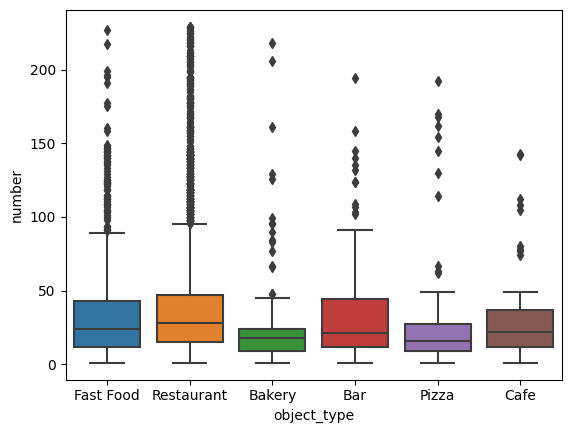

In [9]:
# ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

cadenas = rest_data[rest_data['chain'] == True]


cadenas = rest_data[rest_data['chain'] == True]



sns.boxplot(x='object_type', y='number', data = cadenas)


descriptive_stats_by_object_type = cadenas.groupby('object_type')['number'].describe()
print(descriptive_stats_by_object_type)


Las cadenas suelen tener un promedio de asientos entre 21 y 44 siendo los restaurantes que suelen tener los datos más atipicos pues llegan a haber bastantes restaurantes de hasta 200 asientos, podriamos decir que es el tipo de establecimiento que más varia(eso se puede notar incluso en la desviación estandard de 47 que es la más alta). Del lado contrario los cafes son los que menos varian(desviación estandard de 20), las pizerrias y las panaderias suelen tener muy poca variacion tambien, sin embargo hay más casos especiales(datos atipicos)

              count       mean        std  min   25%   50%   75%    max
object_type                                                            
Bakery        283.0  21.773852  25.691123  1.0   9.0  18.0  24.0  218.0
Bar           292.0  44.767123  46.793403  1.0  13.0  28.5  48.0  227.0
Cafe          435.0  25.000000  21.321870  1.0  11.0  21.0  34.0  143.0
Fast Food    1066.0  31.837711  35.092111  1.0  11.0  21.0  37.0  227.0
Pizza         320.0  28.459375  35.415291  1.0   9.0  18.5  29.0  216.0
Restaurant   7255.0  48.042316  50.505788  1.0  15.0  29.0  49.0  229.0


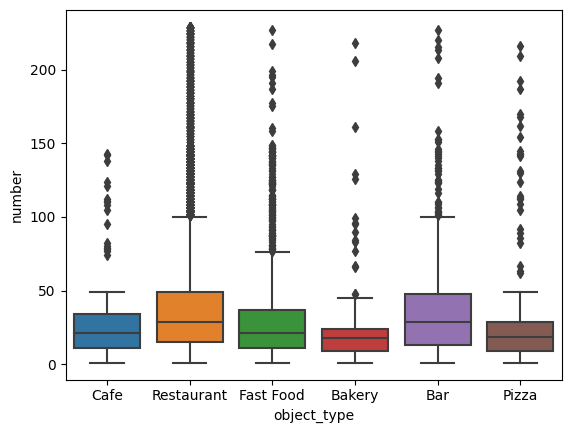

In [10]:
#Promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos?

promedio_asientos = sns.boxplot(x='object_type', y='number', data = rest_data)

statistics_number = rest_data.groupby('object_type')['number'].describe()

print(statistics_number)

En estas grafica se toma en cuenta cadenas y no cadenas, podemos ver que sigue habiendo similitud contra la anterior grafica, se ve que restaurante sigue siendo el que más varia(desviación estandard más alta), también se puede ver que los cafes son ls que menos varian(menor desviacion estandard).

In [11]:
# Se colocan los datos de los nombres de las calles de la columna address en una columna separada.


# Separar los nombres de las calles
rest_data['street_name'] = rest_data['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Mostrar el DataFrame actualizado
display(rest_data)

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


street_name
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
MELROSE AVE          128
Name: object_type, dtype: int64


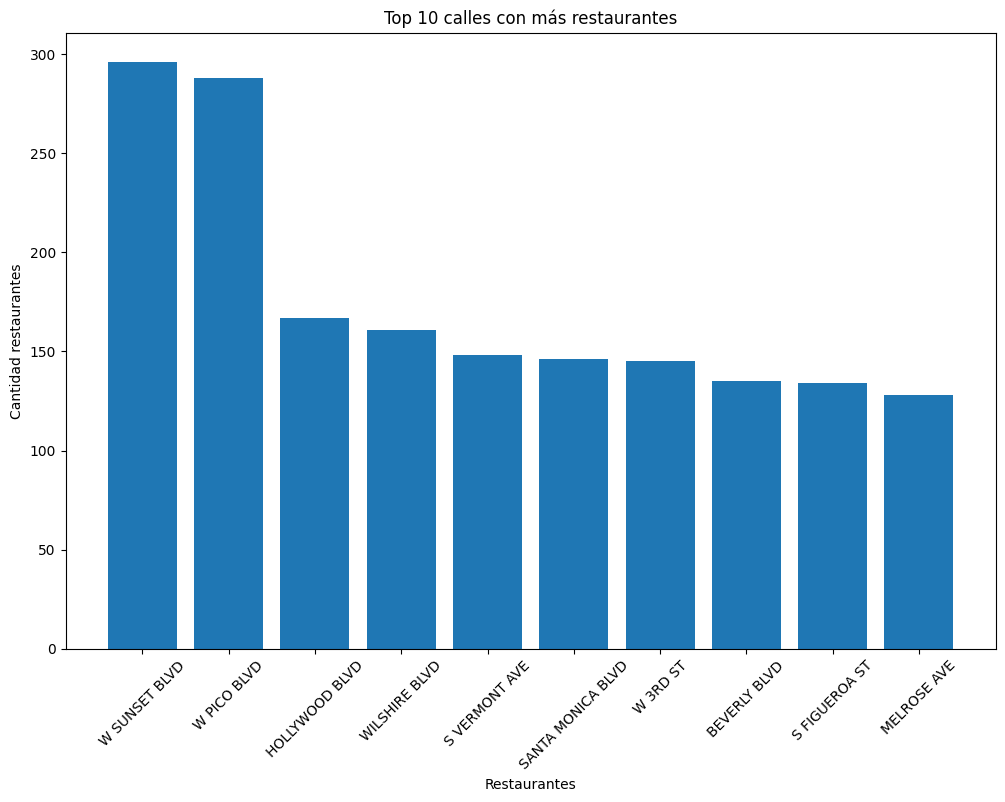

In [12]:
#Diez mejores calles por número de restaurantes.


calles_restaurantes = rest_data.groupby('street_name')['object_type'].count()

top_10 = calles_restaurantes.sort_values(ascending=False).head(10)

print(top_10)

plt.figure(figsize=(12, 8))
plt.bar(top_10.index, top_10.values)
plt.title('Top 10 calles con más restaurantes')
plt.xlabel('Restaurantes')
plt.ylabel('Cantidad restaurantes')
plt.xticks(rotation=45)
plt.show()



Las calles con más establecimientos son W sunset con 296 establecimientos, W pico con 288 establecimientos y Hollywood con 167 establecimientos.



In [13]:
#Numero de calles que solo tienen un restaurante.


calles_restaurantes = rest_data.groupby('street_name')['object_type'].count()

calles_un_restaurante = calles_restaurantes[calles_restaurantes==1]


print('Calles con un restaurante:', calles_un_restaurante.count())
                                            

Calles con un restaurante: 2445


                   count       mean        std  min    25%   50%    75%    max
street_name                                                                   
BEVERLY BLVD       135.0  44.770370  43.946362  1.0  17.00  29.0  48.00  218.0
HOLLYWOOD BLVD     167.0  53.730539  53.512912  1.0  17.00  36.0  66.00  229.0
MELROSE AVE        128.0  52.429688  47.245828  1.0  16.75  38.5  90.00  222.0
S FIGUEROA ST      134.0  50.761194  51.254661  3.0  17.00  28.0  70.00  226.0
S VERMONT AVE      148.0  45.878378  50.974571  1.0  16.25  27.0  47.00  227.0
SANTA MONICA BLVD  146.0  32.390411  32.665995  1.0  12.00  24.0  40.75  185.0
W 3RD ST           145.0  43.931034  41.219038  1.0  16.00  31.0  47.00  161.0
W PICO BLVD        288.0  40.878472  41.772352  1.0  13.00  27.0  45.00  205.0
W SUNSET BLVD      296.0  50.918919  50.484502  1.0  17.00  35.0  66.25  229.0
WILSHIRE BLVD      161.0  62.130435  57.475879  3.0  22.00  40.0  93.00  229.0


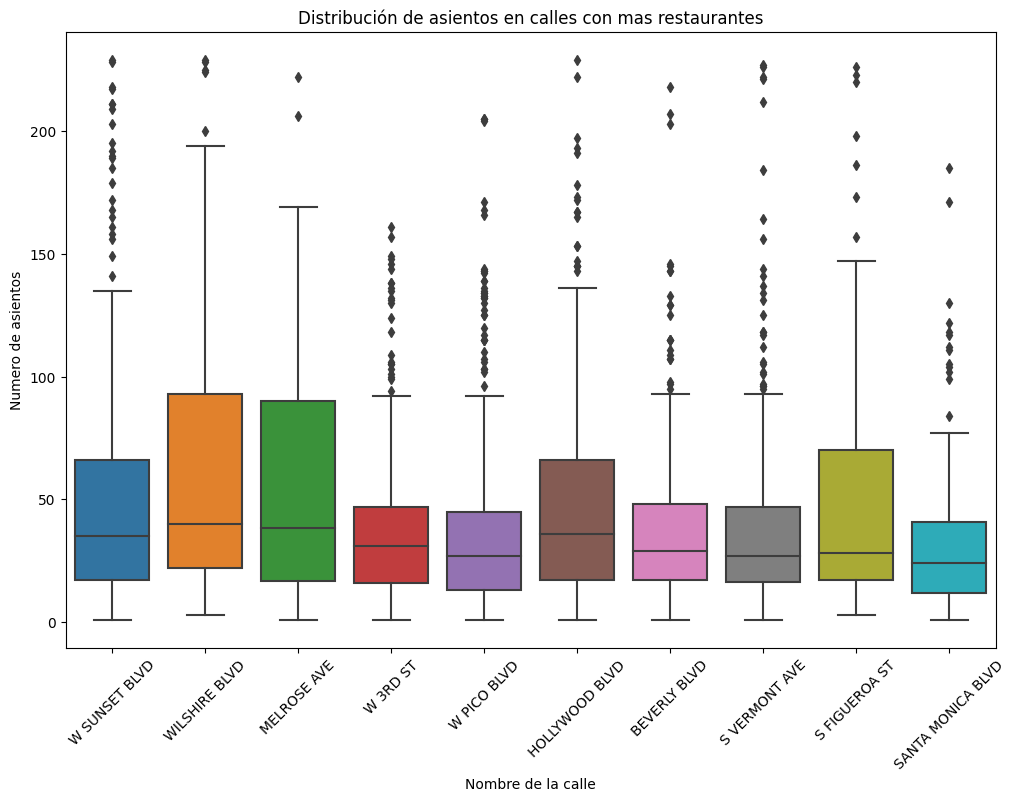

In [14]:
#Distribución del número de asiento de calles con más establecimientos y sus tendencias
calles_restaurantes = rest_data.groupby('street_name')['object_type'].count()
top_10_streets = calles_restaurantes.sort_values(ascending=False).head(10).index

# Filtro de las 10 calles
top_10_data = rest_data[rest_data['street_name'].isin(top_10_streets)]


statistics_number = top_10_data.groupby('street_name')['number'].describe()
print(statistics_number)

plt.figure(figsize=(12, 8))
sns.boxplot(x='street_name', y='number', data=top_10_data)
plt.title('Distribución de asientos en calles con mas restaurantes')
plt.xlabel('Nombre de la calle')
plt.ylabel('Numero de asientos')
plt.xticks(rotation=45)
plt.show()




Se puede ver querr las calles más populares suelen rondar por una media de asientos entre 32 y 61, a la vez la cantidad de asientos varia bastantes por casos especiales(datos atipicos) pues puede haber establecimientos que lleguen a ser de 200 asientos o más. Podría decirse que de primera instancia la distribución de asientos son similares en las calles más populares

# Conclusión

La  mayoria de establecimientos son de tipo restaurante pues estos conforman un 75%, mientras los que le siguen son de tipo comida rápida y café. A la vez dentro de estos se puede decir que el 38.1% de los establecimientos  son cadenas mientras  que el 61.9%  no lo son, ahora dentro de los que son cadena se sabe que la mayoría son restaurantes con 62.4%, le sigue la comida rápida con 16.5%, las panaderías con 7.7% y en cuarto lugar los cafes con 7.2%.

En cuestión de que tan grande es o no un establecimiento tomando en cuenta el número de asientos dentro de esas cadenas se ve que la media de asientos es entre 21 y 44, siendo los restaurantes los cuales tiene casos más variados entre establecimientos chicos y grandes de hasta 229 asientos. Respecto a los cafes se ve que no son muy variados sus datos pues muchos pue en promedio son 20 asientos.(Recordemos que esto es en las cadenas)

Ahora si hablamos de los establecimientos independientemente si son cadena o no se comportan de manera bastante similar a lo anterior dicho sobre las cadenas, restaurantes con la media de asientos más alta y más variada y cafes con una media de 25 asientos sin tanta variación como los demás tipos de establecimientos.

Las calles con más establecimientos son w sunset con 296, w pico con 288 y Hollywood con 167, ahora bien de las calles top 10 con mayor establecimientos se puede ver que en promedio las calles tienen entre 44 y 61 asientos, siendo la mayoría de ellos muy variados pues puede llegar establecimientos de más de 161 asientos.



En resumen podemos decir que
-La mayoria de establecimientos son no cadenas   

-Restaurantes son los que acaparan mas mercado

-Las cafeterias solo acaparan el 4.5% del mercado

-Los cantidad de asientos en promedio es entre 20 y 50, sin embargo este es muy variado

-Las cantidad de asientos en las calles mas populares suele ser en promedio entre 44 a 51 asientos.

Ahora bien, una estrategia es establecer el negocio en la calle con mas establecimientos que es W sunset pues es donde esta la zona popular de restaurantes, que nuestro establecimiento sea de por lo menos 44 asientos si nos queremos establecer aqui pues es el promedio minimo razonable visto en esta calle.